In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
def load_datasets(filename):
    '''
    Читає вхідний файл
    
    Параметри:
    filename - шлях до вхідного файлу з даними
    
    Результат:
    X - набір характеристик
    y - набір передбачуваних величин
    '''
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [76]:
def split_datasets(X, y, test_size = 0.2):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [77]:
def plot_data(X_train, X_test, y_train, y_test):
    '''
    Функція для відображення розподілу тренувальних та тестових даних (для однієї змінної)
    '''
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [78]:
def normalize(X):
    '''
    Нормалізує датасет з характеристиками
    
    Параметри:
    X - набір характеристик
    
    Результат:
    X - набір нормалізованих характеристик
    mean - вектор середніх значень характеристик
    std - вектор стандартних девіацій характеристик
    '''
    ##################
    # Заповнити змінні
    ##################
    X_new=[]
    mean = np.mean(X)
    std = np.std(X)
    for i in X:
        X_new.append((i-mean)/std)
    
    print(X_new)
    return X_new, mean, std

In [79]:
def prepare_X(X):
    '''
    Формує датасет з рисами, де першою колонкою буде колонка з одиницями.
    
    Параметри:
    X - вхідний датасет з прикладами, по одному в рядок. Кожна риса - відповідна колонка.
    
    Результат:
    X_new - датасет, який складається з колонки одиниць, а решта колонок з X    
    '''
    m = np.array(X).shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [80]:
def hypothesis(X, theta):
    '''
    Обчислює значення передбачуваної величини для вхідної матриці X та вектора параметрів thetha.
    
    Параметри:
    X - матриця з рисами. Перша колонка - одиниці. Друга - дані риси.
    thetha - вектор параметрів: [thetha0, thetha1]
    
    Результат:
    Матриця значень шуканої величини для прикладів з X
    '''
    ######################
    h_thetha=[]
    # Один рядок коду
    for i in X:
        h_thetha.append(theta[0]+theta[1]*i[1])
    ######################
    return h_thetha

In [81]:
def cost_function(X, y, theta):
    '''
    Функція для обчислення штрафної функції J.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thethe - вектор параметрів регресії
    
    Результат:
    Дійсне число - значення штрафної функції для набору прикладів X та параметрів thetha
    '''
    m = X.shape[0]
    if m == 0:
        return None
    ######################
    # 1-2 рядки коду
    H=hypothesis(X,theta)
    J=0
    for i in range(len(H)):
        J=J+(H[i]-y.values[i])**2
    ######################
    return J/(2*len(H))

In [82]:
def derivative(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    '''
    Функція для обчислення похідних штрафної функції J по thetha.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор параметрів регресії
    
    Результат:
    Вектор похідних d_thetha
    '''
    ######################
    # 1 рядок коду
#     CF=hypothesis(X,theta)
#     d_thetha=0
#     arr=[]
#     if temp:
#         for i in X:
#             arr.append(i[1])
#     else:
#         arr=np.ones(len(X))
        
#     for i in range(len(X)):
#         d_thetha+=((CF[i]-y[i])*arr[i])
    d_thetha = np.dot(hypothesis(X, theta) - y.values, X)/m

    ######################
    return d_thetha

In [83]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    '''
    Функція, що реалізує градієнтний спуск для метода лінійної регресії.
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    thetha - вектор початкових параметрів регресії
    alpha - швидкість навчання
    num_iters - кількість ітерацій
    print_J - виведення штрафної функції на екран після кожної ітерації
    
    Результат:
    theta - оптимальні значення параметрів регресії
    J_history - масив історичних значень штрафної функції після кожної ітерації
    '''
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        ######################
        # Використати написані вище функції
#         delta = [derivative(X, y, theta,0),derivative(X, y, theta,1)]
#         print('D - ',delta)
# #         
#         theta = [theta[0]-alpha*delta[0],theta[1]-alpha*delta[1]]
#         J = cost_function(X, y, theta)

        delta = derivative(X, y, theta)
        theta = theta - alpha*delta
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [84]:
def plot_J(X, y):
    '''
    Функція для виведення графіків штрафної функції для різних значень параметрів на вхідних даних
    
    Параметри:
    X - тренувальний датасет. 0 - колонка з одиниць, далі - реальні риси
    y - точні значення передбачуваної величини
    '''
    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

## Основний код програми

Отримання датасетів та видрук їх параметрів.

In [85]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


Розбиття датасету на частини:

In [86]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


Відображення тренувальних і тестових даних на графіку (для 1 змінної)

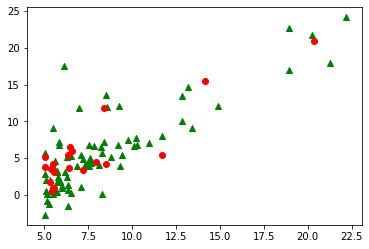

In [87]:
plot_data(X_train, X_test, y_train, y_test)

Підготовка тренувальних даних (додавання 0-колонки з одиницями). Ініціалізація параметрів регресії (0, 0): 

In [88]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0])

[-0.8419076306639044, 0.509650873773817, 3.089159954510707, 3.587978587270252, -0.629451665660835, -0.8443849503092699, -0.0010124435401319912, -0.7151514421426998, 0.22739126667997808, -0.12240110616304439, -0.46014235114788243, -0.8359981910931886, 1.1707855541307504, -0.19623039267753267, -0.6619148751803129, -0.6679275364029189, -0.31119350747027824, -0.8235341766274431, 0.37925612202348186, -0.6859913254837094, -0.6445220268368088, -0.8177537641215903, -0.3169481145631585, -0.21228135954646365, -0.36553970719048506, 0.1358336614533428, -0.19581750606997178, 1.314779758517624, -0.0014511355606653703, -0.5927563684138575, -0.4989794976715821, 0.47403940387168714, -0.6516701262302075, -0.5444744407422019, -0.7725168751806962, -0.4518846189966639, 0.6859018443763877, -0.6631535350029958, -0.5225140343025548, 0.499844816844245, -0.8027092083585889, -0.2258292013570566, -0.2789109358416081, -0.24889924055452325, -0.33439257373260783, 2.7508509904404725, -0.8050575009390918, 0.0566626544

Для спрощення записів аліас для вектора передбачуваних значень

In [89]:
y = y_train[:]


У випадку використання ВСІХ даних для тренування (test_size=0.0), штрафна функція має повернути величину близьку до 32.072.

In [90]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))


X: (77, 2)
y: (77,)
33.18806588697338


Налаштування гіперпараметрів регресії: швидкості навчання та кількості ітерацій.

In [91]:
alpha = 0.01
num_iters = 1500

Запуск градієнтного спуску та видрук знайдених оптимальних значень на екран. У випадку використання всіх даних для тренування, результати будуть близькі до Theta 0: -3.63; Theta 1: 1.17

In [92]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))

Theta 0: 5.901787286961415; Theta 1: 4.6580182783675905


Відображення штрафної функції як функції від thetha0, thetha1.

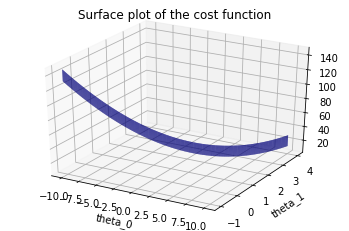

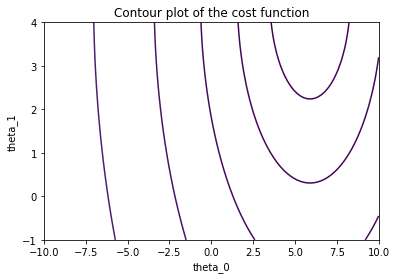

In [93]:
plot_J(X, y)

Відображення знайденої апроксимації разом із тренувальними даними.

[5.90178729 4.65801828]


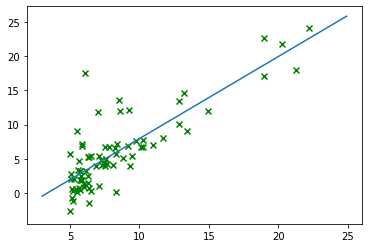

In [96]:
x = np.arange(3, 25, 0.1)
print(new_theta)

h = new_theta[0] + new_theta[1]*(x-mean)/std
plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

Оцінка похибки апроксимації на тестових даних (test_size має бути більше 0.0 та менше 1.0).

In [95]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_norm = (X_test - mean)/std
X_test_proc = prepare_X(X_test_norm)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred         err
68   5.4994   1.01730   2.536582  149.344501
73   7.2259   3.34110   4.611871   38.034498
31   6.5894   5.99660   3.846784   35.850576
15   5.3794   3.51290   2.392339   31.898457
49   5.5416   1.01790   2.587307  154.180852
85   8.5172   4.24150   6.164040   45.326892
39   6.3534   5.49740   3.563107   35.185589
35   7.9334   4.56230   5.462300   19.726900
51   5.3077   1.83960   2.306154   25.361720
8    6.4862   6.59870   3.722736   43.583800
42  11.7080   5.38540   9.999448   85.676984
22   5.4901   4.26300   2.525403   40.759962
11  14.1640  15.50500  12.951611   16.468162
5    8.3829  11.88600   6.002609   49.498496
46   5.0702   5.13370   2.020674   60.639027
18   6.4296   3.65180   3.654701    0.079451
9    5.0546   3.81660   2.001923   47.546960
24   5.5649   3.08250   2.615314   15.156075
69  20.3410  20.99200  20.376494    2.932097
96   5.4369   0.61705   2.461455  298.906945
2.7856418004203385
